In [61]:
import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Digraph
sns.set(style="ticks")


In [62]:
def generateDict(file):
    d = {}
    with open(file) as f:
        for line in f:
            content = line.replace("\n", "").split(",")
            course = content[0]
            prerequisites = [x.strip() for x in content[1:]]
            prerequisites.sort(key=len, reverse=True)
            d[course] = prerequisites
    return d

def getCompletedCourses(file):
    with open(file) as f:
        completed = f.read().splitlines()
        completed_split = [line.split(",") for line in completed]
        return [item.strip() for line in completed_split for item in line]
    
def generateBarGraph(percentage):
    plt.figure(figsize=(26.5, 1))
    series = pd.Series(percentage)
    sns.barplot(x=series.values, y=series.index.astype(str), color="black")
    plt.xticks(range(0, 101, 10), size=20)
    plt.yticks([])
    sns.despine(left=True, bottom=True)
    plt.title("Course Progress for CS Major (2 Courses Until Completion)", fontsize = 30, fontfamily = "monospace")
    plt.savefig('bar_graph.pdf', bbox_inches='tight', pad_inches=0.1)
    return 1

def generateGraph(d):
    G = nx.DiGraph()
    for course in d:
        G.add_node(course)
        for prerequisite in d[course]:
            G.add_edge(course, prerequisite)
    return G

def generateStackedGraph(d):
    G = nx.DiGraph()
    for course in d:
        G.add_node(course)
        before_node = course
        for prerequisite in d[course]:
            G.add_node(prerequisite)
            G.add_edge(before_node, prerequisite)
            before_node = prerequisite 
    return G

def topologicalSort(G):
    return list(nx.topological_sort(G))

def drawGraph(G, completed):
    dot = Digraph()
    for node in G.nodes():
        if node in completed:
            # stub for assignment
            if node == "Advanced Software Development":
                dot.node(node, color='yellow', style='filled')
            # stub for assignment
            elif node == "Internet Scale Architecture" or node == "Discrete Math and Theory 2":
                dot.node(node, color='gray', style='filled')
            else:
                dot.node(node, color='green', style='filled')
        else:
            dot.node(node)
    for edge in G.edges():
        dot.edge(edge[0], edge[1], tailport='w', headport='e', arrowhead='none')
    
    dot.graph_attr['ranksep'] = '7.5'
    dot.node_attr['shape'] = 'box'
    dot.node_attr['nodesep'] = '2'
    dot.graph_attr['rankdir'] = 'RL'
    dot.node_attr.update(fontsize='50')
    dot.graph_attr['size'] = '20,10'
    
    dot.render('course_pathway.gv', view=True)
    
def drawSemesterGraph(G):
    dot = Digraph()
    coloring = "green"
    for node in G.nodes():
        # stub for semester coloring
        if node == "Spring 2024":
            coloring = "yellow"
        elif node == "Fall 2024":
            coloring = "gray"
        # dont color sem titles
        if node[-4:].isdigit():
            dot.node(node, color=coloring, style='filled')
        else:
            dot.node(node)
    for edge in G.edges():
        # edge style invis
        dot.edge(edge[0], edge[1], style='invis')
        
    
    dot.attr('node', shape='plain')
    
    dot.graph_attr['ranksep'] = '.3'
    dot.node_attr['shape'] = 'box'
    dot.graph_attr['rankdir'] = 'TB'
    dot.node_attr.update(fontsize='50')
    dot.graph_attr['size'] = '20,10'

    # title name edited on later
    dot.attr(label=" ", labelloc="tp", fontsize='75', fontname="monospace")

    
        
    dot.render('semesters.gv', view=True)
    
def drawMajorRequirements():
    # stubbed for cs major
    G = nx.DiGraph()
    # core course
    G.add_node("CS Core (Courses 5/6)")
    # cs electives
    G.add_node("CS Electives (Units 6/9)")
    # integration electives
    G.add_node("Integration Elective (Units 10/12)")
    dot = Digraph()
    for node in G.nodes():
        dot.node(node)
    for edge in G.edges():
        dot.edge(edge[0], edge[1])
    
    dot.attr('node', shape='plain')
    
    dot.graph_attr['ranksep'] = '.3'
    dot.node_attr['shape'] = 'box'
    dot.graph_attr['rankdir'] = 'TB'
    dot.node_attr.update(fontsize='50')
    dot.graph_attr['size'] = '20,10'

    dot.render('major_requirements.gv', view=True)

        
# stack pdf files
def stackPDFs():
    import PyPDF2
    pdfs = ['major_requirements.gv.pdf','semesters.gv.pdf','course_pathway.gv.pdf']
    merger = PyPDF2.PdfMerger()
    for pdf in pdfs:
        merger.append(pdf)
    merger.write("output.pdf")
    merger.close()
    

In [63]:
file = "example_semester_courses.txt" # courses taken in $semester, $prerequisite1, $prerequisite2 form
d = generateDict(file)
H = generateStackedGraph(d)
topology = topologicalSort(H)
drawSemesterGraph(H)

completed = getCompletedCourses(file)

In [64]:
completed

['Spring 2023',
 'Data Structures and Algorithms 1',
 'Discrete Math and Theory 1',
 'Computer Systems and Organization 1',
 'Fall 2023',
 'Data Structures and Algorithms 2',
 'Computer Systems and Organization 2',
 'Cybersecurity',
 'Software Development Essentials',
 'Spring 2024',
 'Advanced Software Development',
 'Virtual Worlds and Reality',
 'Data Visualization',
 'Fall 2024',
 'Internet Scale Architecture',
 'Discrete Math and Theory 2']

In [65]:
file = "example_cs_major edit.txt" # course reqs in $course, $prerequisite1, $prerequisite2 form
d = generateDict(file)
G = generateGraph(d)
topology = topologicalSort(G)
drawGraph(G, completed)

1

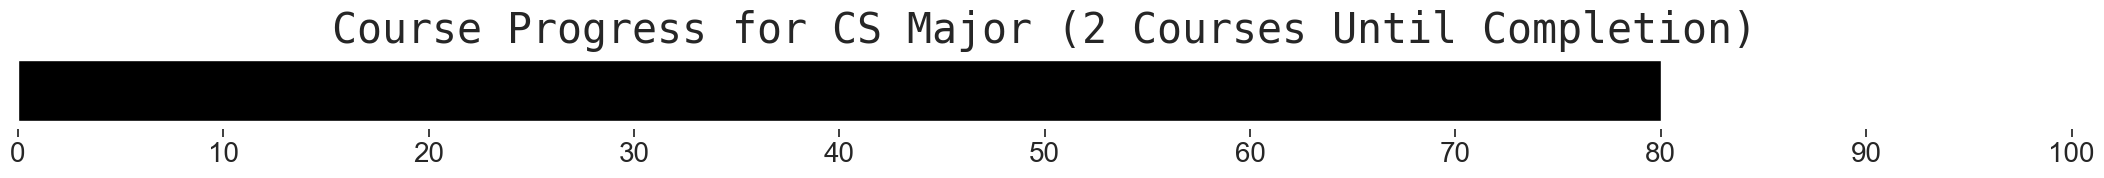

In [66]:
percentage = 80
generateBarGraph(percentage)

In [67]:
drawMajorRequirements()

In [68]:
# stack pdf files
stackPDFs()

import os
os.open("output.pdf", os.O_RDWR)

12